In [13]:
from math import *
import operator

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas.plotting import parallel_coordinates

import seaborn as sns
sns.set(style="white", color_codes=True)

In [14]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

Python: 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.14.2
matplotlib: 2.1.2
pandas: 0.20.3


In [15]:
location_iris = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\iris.csv"

In [16]:
df_iris = pd.read_csv(location_iris)

In [17]:
df_iris.shape

(150, 5)

In [18]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [19]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [20]:
# Now we can take a look at a summary of each attribute.

# This includes the count, mean, the min and max values as well as some 
# percentiles.
# similar ranges between 0 and 8 centimeters.
df_iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [21]:
# Class Distribution
df_iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [22]:
df_iris['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [23]:
df_iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Scatter plot

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


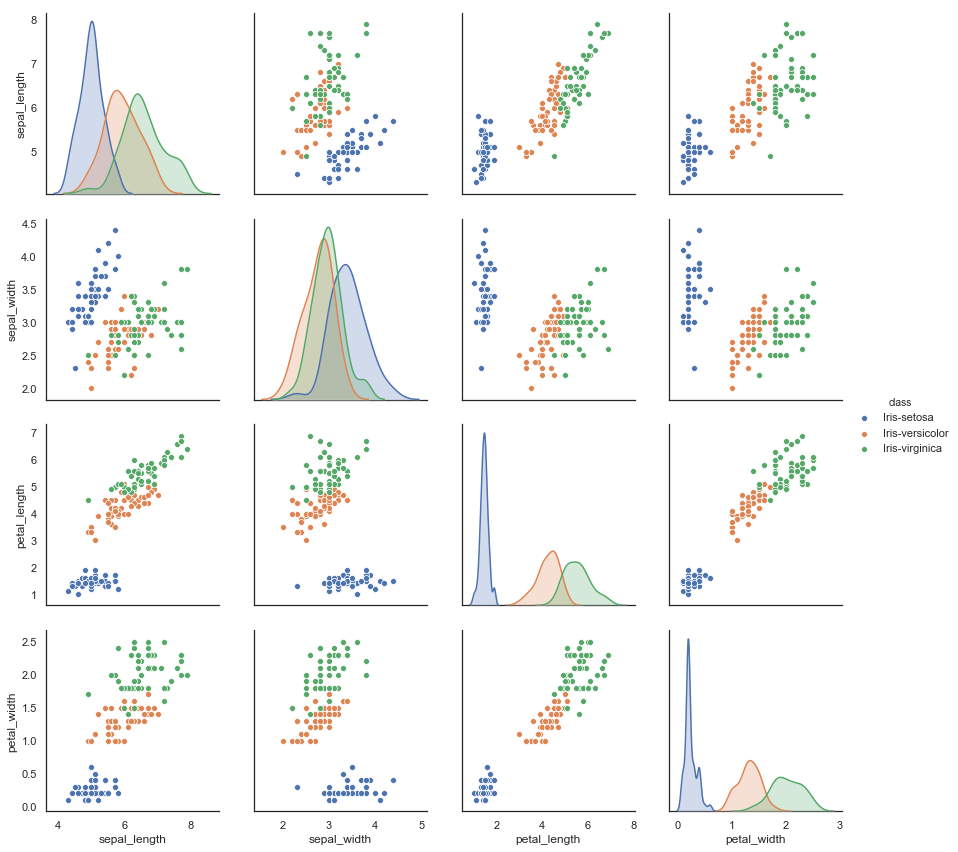

In [24]:
# seaborn plot is the pairplot, which shows the bivariate relation between 
# each # pair of features From the pairplot, 
# we'll see that the Iris-setosa species is separataed from the other two 
# across # all feature combinations 
sns.pairplot(df_iris, hue="class", size=3);

#### t-Tests Comparing Two Groups

#### Calculation
The calculation of the t-statistic for two independent samples is as follows:

t = observed difference between sample means / standard error of the difference between the means

or

t = (mean(X1) - mean(X2)) / sed

Where X1 and X2 are the first and second data samples and __sed__ is the standard error of the difference between the means.

The standard error of the difference between the means can be calculated as follows:

sed = sqrt(se1^2 + se2^2)

Where se1 and se2 are the standard errors for the first and second datasets.

The standard error of a sample can be calculated as:

se = std / sqrt(n)

Where __se__ is the standard error of the sample, __std__ is the sample standard deviation, and __n__ is the number of observations in the sample.

These calculations make the following __assumptions__:

> - The samples are drawn from a Gaussian distribution.
> - The size of each sample is approximately equal.
> - The samples have the same variance.

In [25]:
# seed the random number generator
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind

np.random.seed(1)

In [26]:
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51

In [27]:
# calculate means
mean1, mean2 = np.mean(data1), np.mean(data2)

In [29]:
# calculate standard errors
se1, se2 = scipy.stats.sem(data1), scipy.stats.sem(data2)

In [30]:
# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)

In [31]:
# calculate the t statistic
t_stat = (mean1 - mean2) / sed

In [32]:
t_stat

-2.2620139704259556

In [33]:
# degrees of freedom
degree_freedom = len(data1) + len(data2) - 2

In [49]:
degree_freedom

198

In [34]:
# calculate the critical value
alpha = 0.05
cv = scipy.stats.t.ppf(1.0 - alpha, degree_freedom)

In [52]:
cv

1.6525857836172075

In [35]:
# calculate the p-value
p = (1.0 - scipy.stats.t.cdf(abs(t_stat), degree_freedom)) * 2.0

In [54]:
p

0.024782819014639745

In [55]:
# compare samples
print('t=%.3f, p=%.3f' % (t_stat, p))

# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis --> the means are equal.')
else:
    print('Reject the null hypothesis --> the means are NOT equal.')
    
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis --> the means are equal.')
else:
    print('Reject the null hypothesis --> the means are NOT equal.')

t=-2.262, p=0.025
Reject the null hypothesis --> the means are NOT equal.
Reject the null hypothesis --> the means are NOT equal.


#### t-test on iris dataset

In [36]:
# Importing the required libraries
import pandas as pd

# Two different methods of conducting a t-test
import researchpy as rp
from scipy import stats

In [37]:
location_iris = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\iris.csv"

In [38]:
df_iris = pd.read_csv(location_iris)
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [39]:
# Showing descriptive statistics from pandas.describe()
df_iris.groupby("class")['sepal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [40]:
# Showing descriptive statistics from researchpy.summary_cont()
rp.summary_cont(df_iris.groupby("class")['sepal_width'])

,N,Mean,SD,SE,95% Conf.,Interval
class,,,,,,
Iris-setosa,50,3.418,0.381024,0.053885,3.311313,3.524687
Iris-versicolor,50,2.770,0.313798,0.044378,2.682136,2.857864
Iris-virginica,50,2.974,0.322497,0.045608,2.883701,3.064299


- Ignoring the species Iris-virginica
- there is a difference between the __average__ sepal width between the __setosa and versicolor__ species
- the standard deviations are small for both groups, 
- the 95% confidence intervals do not overlap so there should be a significant difference between these two

In [41]:
# create 2 data frames that are subsets of the original data where each data frame
# only contains data for a respective flower species
setosa = df_iris[(df_iris['class']     == 'Iris-setosa')]
setosa.reset_index(inplace= True)

versicolor = df_iris[(df_iris['class'] == 'Iris-versicolor')]
versicolor.reset_index(inplace= True)

In [42]:
setosa.shape, versicolor.shape

((50, 6), (50, 6))

In [43]:
versicolor.head(3)

,index,sepal_length,sepal_width,petal_length,petal_width,class
0,50,7.0,3.2,4.7,1.4,Iris-versicolor
1,51,6.4,3.2,4.5,1.5,Iris-versicolor
2,52,6.9,3.1,4.9,1.5,Iris-versicolor


#### Assumption Check

Before the t-test can be conducted, the assumptions of the t-test need to be checked to see if the t-test results can be trusted.

#### 1. Homogeneity of variances

In [37]:
# scipy.stats.levene
# Perform Levene test for equal variances.

In [44]:
stats.levene(setosa['sepal_width'], versicolor['sepal_width'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.41728596812962016)

- The test is not significant meaning there is homogeneity of variances and we can proceed.

#### 2. Normal distribution of residuals

-Next to test the assumption of normality. The residuals needs to be normally distributed. To calculate the residuals between the groups, subtract the values of one group from the values of the other group.

In [45]:
diff = setosa['sepal_width'] - versicolor['sepal_width']

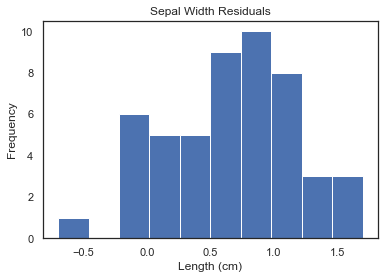

In [46]:
# check for normality visually with a p-p plot and a histogram plot.

diff.plot(kind= "hist", title= "Sepal Width Residuals")
plt.xlabel("Length (cm)")
plt.savefig("Residuals Plot of Sepal Width.png")

#### 1. Independent t-test using scipy.stats

- To conduct the independent t-test using scipy.stats, use the stats.ttest_ind() method

- Calculate the T-test for the means of two independent samples of scores.

- This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [48]:
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

In [65]:
p = stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])[1]

In [66]:
# interpret via p-value
alpha = .05
if p > alpha:
    print('Accept null hypothesis --> the means are equal.')
else:
    print('Reject the null hypothesis --> the means are NOT equal.')

Reject the null hypothesis --> the means are NOT equal.


#### 2. Independent t-test using researchpy
- To conduct the independent t-test using researchpy, use the researchpy.ttest() method

In [44]:
descriptives, results = rp.ttest(setosa['sepal_width'], versicolor['sepal_width'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sepal_width,50.0,3.418,0.381024,0.053885,3.309714,3.526286
1,sepal_width,50.0,2.770,0.313798,0.044378,2.680820,2.859180
2,combined,100.0,3.094,0.476057,0.047606,2.999540,3.188460


In [45]:
results

,Independent t-test,results
0,Difference (sepal_width - sepal_width) =,0.6480
1,Degrees of freedom =,98.0000
2,t =,9.2828
3,Two side test p value =,0.0000
4,Mean of sepal_width > mean of sepal_width p va...,1.0000
5,Mean of sepal_width < mean of sepal_width p va...,0.0000
6,Cohen's d =,1.8566
7,Hedge's g =,1.8423
8,Glass's delta =,1.7007
9,r =,0.6840
